In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [ ]:
from mtcnn.mtcnn import MTCNN

In [8]:
images=os.path.join("/content/mask detection")
annotations=os.path.join("/content/mask detection")
train=pd.read_csv(os.path.join("/content/train.csv"))
submission=pd.read_csv(os.path.join("/content/submission.csv"))

In [ ]:
print(len(train))
train.head()

15412


,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [ ]:
print(len(submission))
submission.head()

8142


,name,x1,x2,y1,y2,classname
0,1800.jpg,NaN,NaN,NaN,NaN,NaN
1,1800.jpg,NaN,NaN,NaN,NaN,NaN
2,1800.jpg,NaN,NaN,NaN,NaN,NaN
3,1799.jpg,NaN,NaN,NaN,NaN,NaN
4,1799.jpg,NaN,NaN,NaN,NaN,NaN


In [9]:
len(os.listdir(images))

559

In [10]:
a=os.listdir(images)
b=os.listdir(annotations)
a.sort()
b.sort()

In [14]:
print(len(b),len(a))

559 559


In [12]:
train_images=a[1698:]
test_images=a[:1698]

In [13]:
test_images[0]

'02C96BZM5DKA178WY34I.jpg'

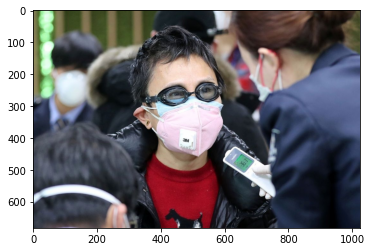

In [16]:
img=plt.imread(os.path.join(images,test_images[0]))
plt.imshow(img)
plt.show()

In [19]:
options=['face_with_mask','face_no_mask']
train= train[train['classname'].isin(options)]
train.sort_values('name',axis=0,inplace=True)

<BarContainer object of 2 artists>

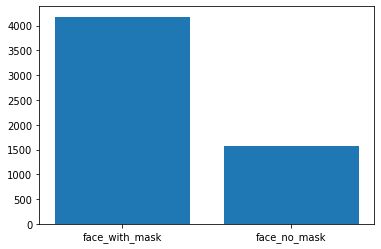

In [23]:
plt.bar(['face_with_mask','face_no_mask'],train.classname.value_counts())

In [26]:
x=[]
y=[]
for features, labels in data:
    x.append(features)
    y.append(labels)
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=lbl.fit_transform(y)

In [28]:
from keras.layers import LSTM
model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=x.shape[1:],activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

1/1 [==============================] - 0s 239ms/step


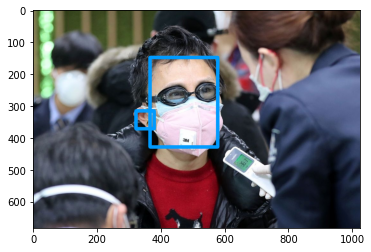

In [30]:
detector=MTCNN()
img=plt.imread(os.path.join(images,test_images[0]))
face=detector.detect_faces(img)
for face in face:
        bounding_box=face['box']
        x=cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              10)
        plt.imshow(x)

1/1 [==============================] - 0s 114ms/step


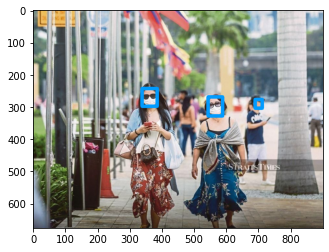

In [31]:
img=plt.imread(os.path.join(images,test_images[3]))
face=detector.detect_faces(img)
for face in face:
        bounding_box=face['box']
        x=cv2.rectangle(img,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              10)
        plt.imshow(x)